In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
os.chdir('C:\\book\\4. Метод к-средних\\1_beverage\\')
df = pd.read_csv('beverage_r.csv',sep=';',index_col = 0)
df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


In [10]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2,random_state = 42)

In [11]:
model.fit(df)

KMeans(n_clusters=2, random_state=42)

Предсказывания нового объкта

In [16]:
new_items = [[1,0,1,0,1,0,1,0],[0,0,0,0,0,0,0,0]]
model.predict(new_items)

array([0, 0])

Нахождения числа кластеров

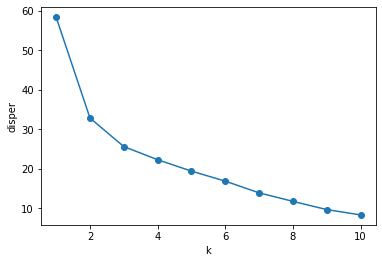

In [27]:
K = range(1,11)
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

#график
plt.plot(K,dist,marker = 'o')
plt.xlabel('k')
plt.ylabel('disper')
plt.show()

In [28]:
model = KMeans(n_clusters = 3,random_state = 42)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
0,0.000000,1.000000,0.545455,0.545455,0.000000,0.0,0.909091,0.000000
1,1.000000,0.250000,0.083333,0.000000,0.916667,0.0,0.000000,0.333333
2,0.727273,0.272727,0.090909,0.090909,0.454545,1.0,0.090909,0.454545


Попробуем ввести опрос для нового человека.

In [31]:
new_items = [[1,0,0,0,1,0,0,0]]
model.predict(new_items)

array([1])

# Пример 2

In [35]:
os.chdir('C:\\book\\4. Метод к-средних\\2_pretendent\\')
df = pd.read_csv('assess.dat',sep='\t',index_col = 'NAME')

In [36]:
df.head(
)

,NR,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NAME,,,,,,,,,,,
Volker,1,10,10,9,10,10,10,9,10,10,9
Sigrid,2,10,10,4,10,5,5,4,5,4,3
Elmar,3,5,4,10,5,10,4,10,5,3,10
Peter,4,10,10,9,10,10,10,9,10,10,9
Otto,5,4,3,5,4,3,10,4,10,10,5


In [39]:
df = df.drop(['NR'], axis=1)

In [40]:
df.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NAME,,,,,,,,,,
Volker,10,10,9,10,10,10,9,10,10,9
Sigrid,10,10,4,10,5,5,4,5,4,3
Elmar,5,4,10,5,10,4,10,5,3,10
Peter,10,10,9,10,10,10,9,10,10,9
Otto,4,3,5,4,3,10,4,10,10,5


In [41]:
model = KMeans(n_clusters = 2,random_state = 42)
model.fit(df)


KMeans(n_clusters=2, random_state=42)

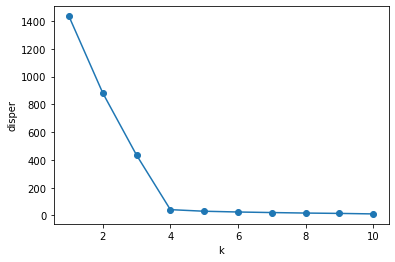

In [42]:
K = range(1,11)
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

#график
plt.plot(K,dist,marker = 'o')
plt.xlabel('k')
plt.ylabel('disper')
plt.show()

In [43]:
model = KMeans(n_clusters = 4,random_state = 42)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
cluster,,,,,,,,,,
0,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50


также можно было воспользоваться иерархической класт.

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
link = linkage(df,'ward','euclidean') #ward - метод вычисления растояния ммежду класстерами.
                                      # euclidean - метод вычисления растояния между точками.

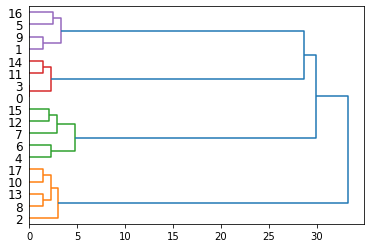

In [45]:
dn = dendrogram(link, orientation = 'right')